In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
df = pd.read_csv('/content/Country-data (1).csv')
df['diff_exports'] = df['exports'] - df['imports']
df.drop(columns = ['exports', 'imports'])



,country,child_mort,health,income,inflation,life_expec,total_fer,gdpp,diff_exports
0,Afghanistan,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9
1,Albania,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6
2,Algeria,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0
3,Angola,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4
4,Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,2.62,63.0,3.50,2970,-6.1
163,Venezuela,17.1,4.91,16500,45.90,75.4,2.47,13500,10.9
164,Vietnam,23.3,6.84,4490,12.10,73.1,1.95,1310,-8.2
165,Yemen,56.3,5.18,4480,23.60,67.5,4.67,1310,-4.4


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,diff_exports
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,-5.781239
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,18.942578
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,-73.500000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,-14.850000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,-4.800000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,3.850000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,39.400000


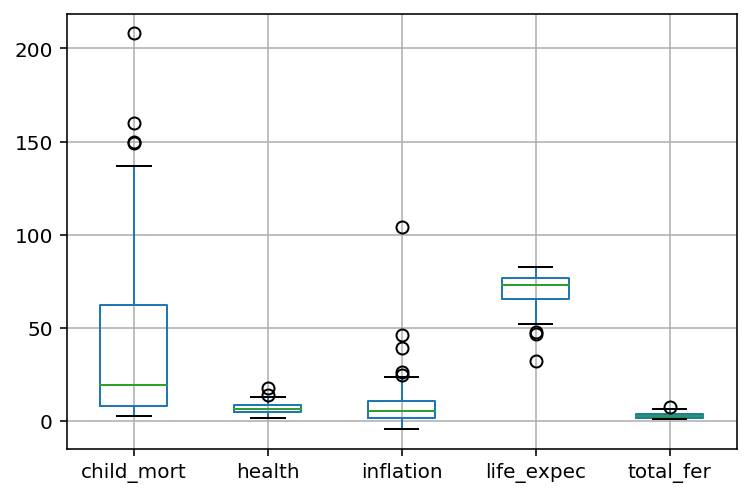

In [7]:
boxplot = df.boxplot(column = ['child_mort' , 'health' , 'inflation','life_expec','total_fer'])


In [0]:
# Standardize the data to have a mean of ~0 and a variance of 1
df_values = df.drop(columns = 'country')
X_std = StandardScaler().fit_transform(df_values)



In [9]:
#Finding the outliers 

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(X_std)
list(clusters).count(-1)


6

In [0]:
import numpy as np

In [0]:
i = np.where(clusters == -1)


In [12]:
for j in list(i): 
  print(df.iloc[j,:])

        country  child_mort  exports  ...  total_fer    gdpp  diff_exports
66        Haiti       208.0     15.3  ...       3.33     662         -49.4
91   Luxembourg         2.8    175.0  ...       1.63  105000          33.0
98        Malta         6.8    153.0  ...       1.36   21100          -1.0
113     Nigeria       130.0     25.3  ...       5.84    2330           7.9
123       Qatar         9.0     62.3  ...       2.07   70300          38.5
133   Singapore         2.8    200.0  ...       1.15   46600          26.0

[6 rows x 11 columns]




*   Haiti has the highest child_mort
*   Luxembourg has the highest gdpp



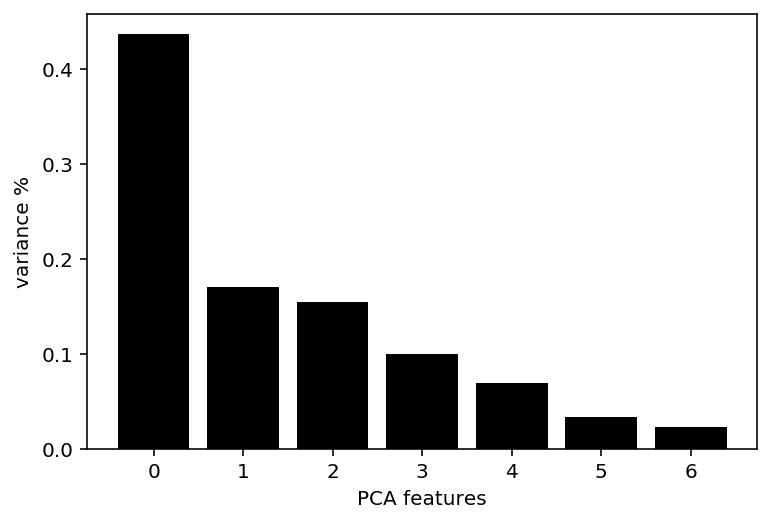

In [13]:
# Create a PCA instance: pca
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

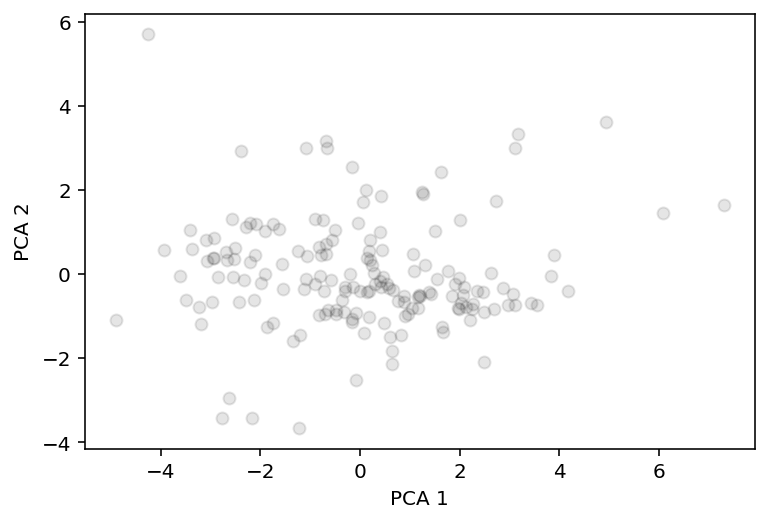

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [0]:
# only PCA 1,2,3 features have the main variance 

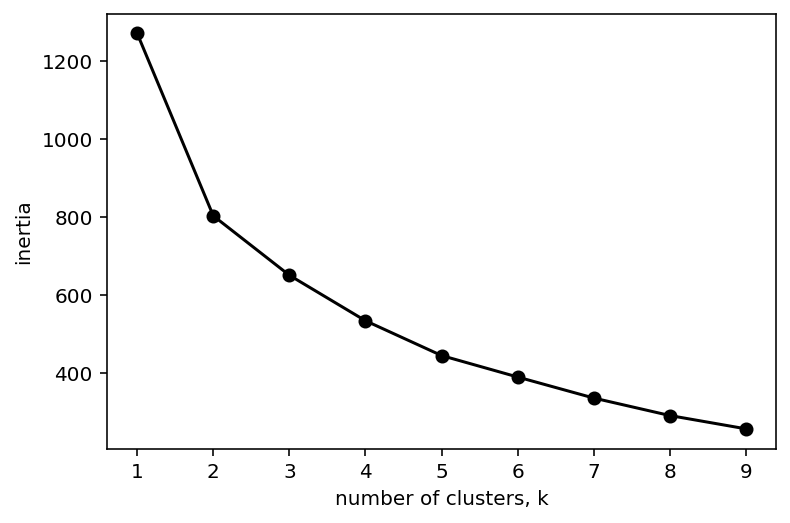

In [16]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
#elbow point = 2 


In [0]:
km = KMeans(
    n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0
)
y_km = km.fit_predict(X_std)

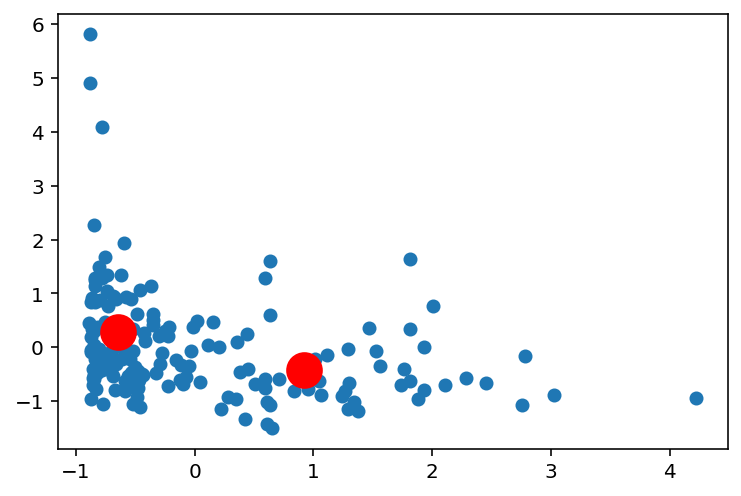

In [18]:
X = X_std

plt.scatter(X[:,0], X[:,1])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red')
plt.show()